In [1]:
!pip install scikit-learn
!pip install xgboost
import warnings
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
file_path = 'D:\\Fall 2024\\Clean Energy\\NY Energy Data.csv'
data = pd.read_csv(file_path)

In [6]:
data.head()

,Region,Median Income,Solar Potential (MW),Wind Potential (MW),Avg Energy Price ($/kWh),Subsidy Amount ($),Public Awareness (%),Grid Capacity (MW),Renewable Market Share (%),Fossil Market Share (%),Policy Support Index
0,Adirondacks,57450.71230,444.817882,965.955294,0.117468,6312654.483,78.949988,344.206724,75.045453,24.954547,61.895087
1,Albany,47926.03548,383.345878,437.383522,0.125644,3412572.767,43.466434,1810.669981,47.571515,52.428485,67.068311
2,Binghamton,59715.32807,363.657083,357.140878,0.120380,6617340.171,43.429057,1185.666277,47.729720,52.270280,65.178572
3,Buffalo,72845.44785,366.117838,881.739215,0.106800,4684704.870,62.218465,1671.135986,78.642109,21.357891,55.623828
4,Catskills,46487.69938,211.771018,301.236255,0.152426,5968424.628,65.576396,1014.172912,27.753378,72.246622,52.084022


In [7]:
# Define features and target
features = [
    "Median Income", "Solar Potential (MW)", "Wind Potential (MW)",
    "Avg Energy Price ($/kWh)", "Subsidy Amount ($)", "Public Awareness (%)",
    "Grid Capacity (MW)", "Policy Support Index"
]
target = "Renewable Market Share (%)"

X = data[features]
y = data[target]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specifies the independent variables (features) and the dependent variable (target).
# Splits the data into training and test sets using an 80-20 split.

In [8]:
# Descriptive Analytics
print("Descriptive Statistics:")
print(data.describe())

Descriptive Statistics:
       Median Income  Solar Potential (MW)  Wind Potential (MW)  \
count     200.000000            200.000000           200.000000   
mean    49434.916406            273.346021           552.158991   
std     13850.656975            133.464371           265.056177   
min     20000.000000             54.876943           110.939027   
25%     39423.084875            162.326714           321.515832   
50%     49937.121740            281.219618           550.836761   
75%     57512.787100            388.681449           774.981174   
max     90802.537500            495.727314           999.745906   

       Avg Energy Price ($/kWh)  Subsidy Amount ($)  Public Awareness (%)  \
count                200.000000        2.000000e+02            200.000000   
mean                   0.147359        5.605854e+06             60.428401   
std                    0.048255        2.691480e+06             17.741679   
min                    0.050000        1.098962e+06             

In [9]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(random_state=42),
    "AdaBoost Regression": AdaBoostRegressor(random_state=42),
    "XGBoost Regression": XGBRegressor(random_state=42)
}

# Train and evaluate models
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluation metrics
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Store results
    results[model_name] = {
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse,
        "Train R2": train_r2,
        "Test R2": test_r2
    }

# Display results
print("\nModel Performance:")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()


Model Performance:
Linear Regression:
  Train RMSE: 5.1334
  Test RMSE: 4.7075
  Train R2: 0.8567
  Test R2: 0.9077

Random Forest Regression:
  Train RMSE: 2.3719
  Test RMSE: 6.7257
  Train R2: 0.9694
  Test R2: 0.8115

Gradient Boosting Regression:
  Train RMSE: 1.5922
  Test RMSE: 6.8512
  Train R2: 0.9862
  Test R2: 0.8044

AdaBoost Regression:
  Train RMSE: 4.4636
  Test RMSE: 6.8906
  Train R2: 0.8916
  Test R2: 0.8022

XGBoost Regression:
  Train RMSE: 0.0010
  Test RMSE: 7.2854
  Train R2: 1.0000
  Test R2: 0.7789



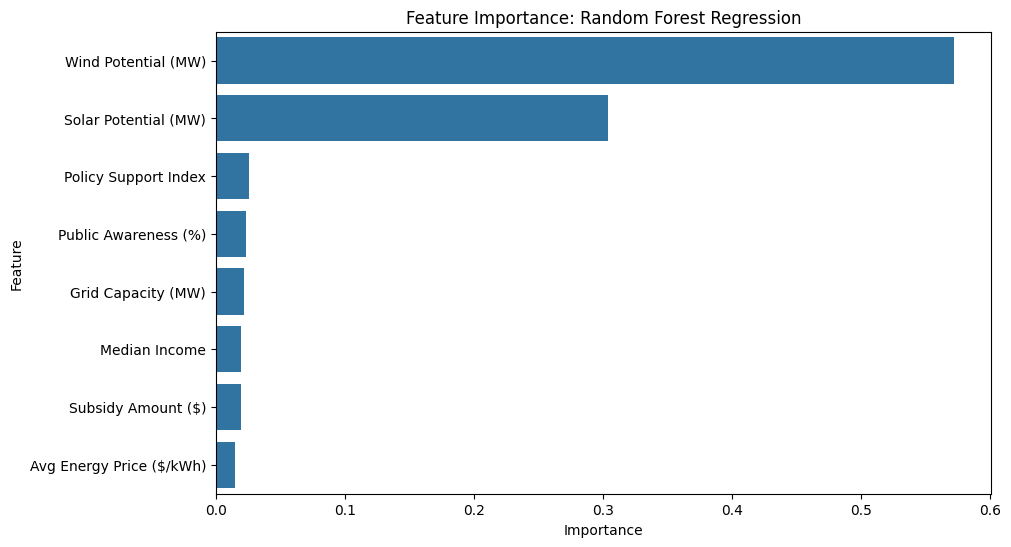

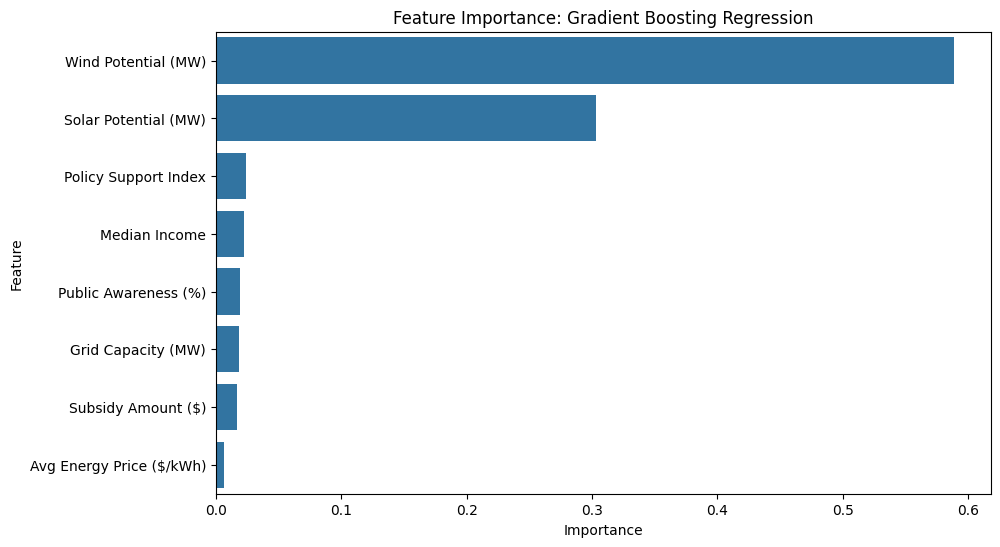

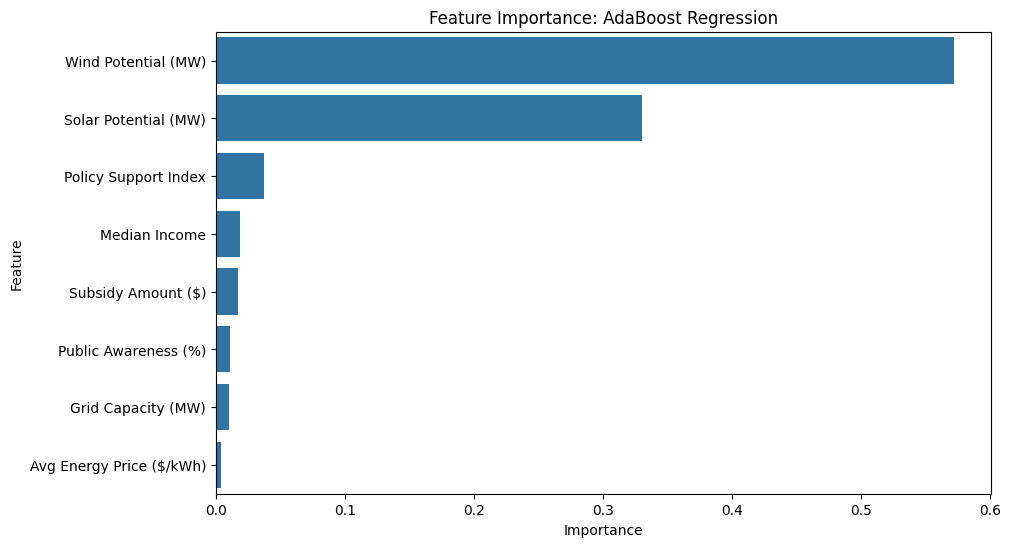

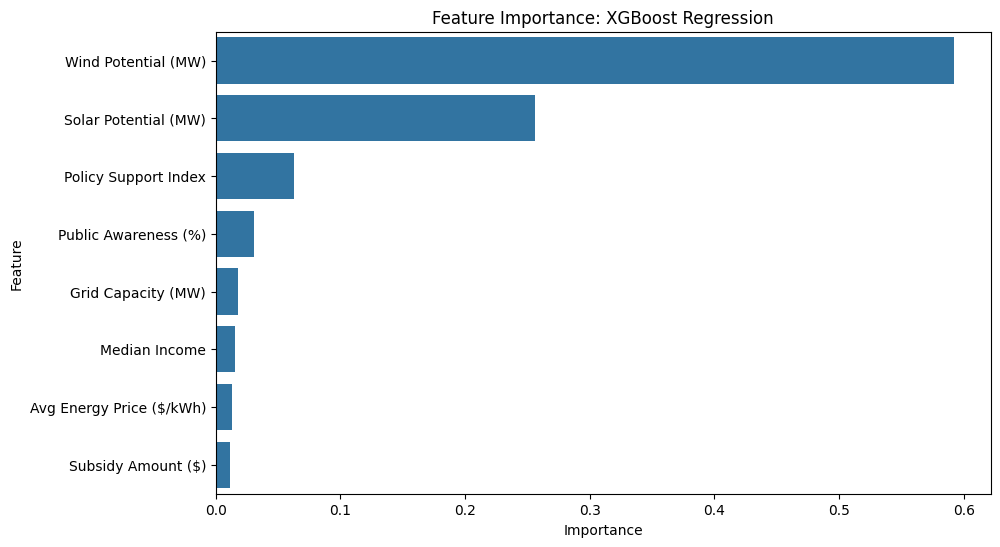

In [10]:
# Visualization: Feature Importance for Tree-Based Models
for model_name, model in models.items():
    if hasattr(model, "feature_importances_"):
        feature_importance = model.feature_importances_
        importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importance})
        importance_df = importance_df.sort_values(by="Importance", ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x="Importance", y="Feature", data=importance_df)
        plt.title(f"Feature Importance: {model_name}")
        plt.show()

# Extracts and visualizes the importance of features in predicting the target variable.
# Helps identify the most influential factors governing renewable energy adoption.

In [11]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [12]:
# 1. Statistical Feature Selection using SelectKBest
print("Statistical Feature Selection:")
selector = SelectKBest(score_func=f_regression, k="all")
selector.fit(X, y)

scores = pd.DataFrame({
    "Feature": features,
    "Score": selector.scores_,
    "P-Value": selector.pvalues_
}).sort_values(by="Score", ascending=False)
print(scores)

Statistical Feature Selection:
                    Feature       Score       P-Value
2       Wind Potential (MW)  228.542773  7.766989e-35
1      Solar Potential (MW)   68.337478  1.969803e-14
4        Subsidy Amount ($)    1.821058  1.787284e-01
3  Avg Energy Price ($/kWh)    1.320131  2.519546e-01
5      Public Awareness (%)    0.765202  3.827654e-01
7      Policy Support Index    0.665998  4.154312e-01
6        Grid Capacity (MW)    0.622167  4.311865e-01
0             Median Income    0.318291  5.732749e-01


In [13]:
# 2. Feature Importance Using Random Forest
print("\nRandom Forest Feature Importance:")
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

importance = pd.DataFrame({
    "Feature": features,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)
print(importance)


Random Forest Feature Importance:
                    Feature  Importance
2       Wind Potential (MW)    0.574875
1      Solar Potential (MW)    0.310578
7      Policy Support Index    0.025584
4        Subsidy Amount ($)    0.022686
0             Median Income    0.017947
6        Grid Capacity (MW)    0.017645
5      Public Awareness (%)    0.015617
3  Avg Energy Price ($/kWh)    0.015068


In [14]:
# 3. Normalized Importance Analysis
# Normalize scores and combine statistical & tree-based importances
scaler = StandardScaler()
normalized_scores = scaler.fit_transform(scores["Score"].values.reshape(-1, 1))
normalized_importance = scaler.fit_transform(importance["Importance"].values.reshape(-1, 1))

combined_importance = pd.DataFrame({
    "Feature": features,
    "Statistical Score": normalized_scores.flatten(),
    "Tree-Based Importance": normalized_importance.flatten()
})

combined_importance["Overall Importance"] = (
    combined_importance["Statistical Score"] + combined_importance["Tree-Based Importance"]
)
combined_importance = combined_importance.sort_values(by="Overall Importance", ascending=False)

print("\nCombined Feature Importance:")
print(combined_importance)


Combined Feature Importance:
                    Feature  Statistical Score  Tree-Based Importance  \
0             Median Income           2.529842               2.307001   
1      Solar Potential (MW)           0.405032               0.951658   
2       Wind Potential (MW)          -0.477179              -0.509815   
3  Avg Energy Price ($/kWh)          -0.483823              -0.524677   
4        Subsidy Amount ($)          -0.491183              -0.548975   
5      Public Awareness (%)          -0.492499              -0.550526   
6        Grid Capacity (MW)          -0.493080              -0.560925   
7      Policy Support Index          -0.497110              -0.563742   

   Overall Importance  
0            4.836844  
1            1.356690  
2           -0.986994  
3           -1.008500  
4           -1.040158  
5           -1.043025  
6           -1.054005  
7           -1.060852  


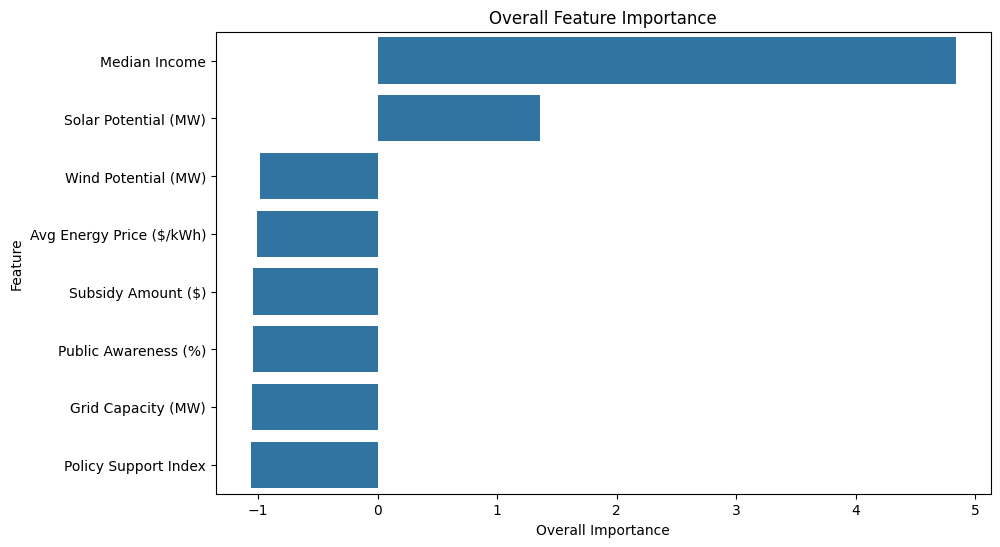

In [15]:
# Visualize Combined Importance
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Overall Importance", 
    y="Feature", 
    data=combined_importance.sort_values(by="Overall Importance", ascending=False)
)
plt.title("Overall Feature Importance")
plt.show()

# Median Income and Solar Potentail are the most important features for considering new renewable energy technology into yh